# Simple Linear Regression

## **What is Linear Regression?**

Imagine you’re a coach on the basketball team.
You want to know:

> "If I know how many hours a player practices each week, can I predict how many points they’ll score in a game?"

You have a bunch of data:

* **Practice hours** (input)
* **Points scored** (output)

You plot the data on a graph, and you notice they form a general upward trend — the more hours they practice, the more points they tend to score.

**Linear Regression** is a way to draw the *best straight line* through this data so you can make predictions.

---

## **The Main Idea**

We want a **straight-line equation**:

$$
y = m \cdot x + b
$$

Where:

* $y$ = predicted output (e.g., points scored)
* $x$ = input (e.g., hours practiced)
* $m$ = slope (how much $y$ changes for each 1 unit of $x$)
* $b$ = y-intercept (what $y$ would be when $x = 0$)

---

## **Example**

Let’s say you collect this data:

| Hours Practiced (x) | Points Scored (y) |
| ------------------- | ----------------- |
| 1                   | 6                 |
| 2                   | 7                 |
| 3                   | 8                 |
| 4                   | 10                |
| 5                   | 12                |

If we draw the best-fit line, we might find:

$$
y = 1.5x + 4
$$

That means:

* For every extra hour practiced, a player scores **1.5 more points** on average.
* If they practice **0 hours**, they still score **4 points** (maybe from pure luck or skill).

---

## **Why “Best” Line?**

We could draw many lines through the data.
**Linear Regression picks the one where the predictions are as close as possible to the real data points.**
This is usually done by minimizing the **error** (the distance between actual and predicted values) using something called the **least squares method**.

---

## **What Can We Do With It?**

* **Predict:** If someone practices 6 hours,

  $$
  y = 1.5(6) + 4 = 13
  $$

  → They might score **13 points**.
* **Understand trends:** How strongly are the input and output related? (Here, the positive slope means *more practice → more points*).

---

## **Key Takeaways**

1. **Linear Regression = Best-fit line** to describe a relationship between two things.
2. Uses equation $y = mx + b$.
3. Helps us **predict future values**.
4. Works best when the data points roughly follow a straight-line pattern.

Learned equation: y = 1.500 * x + 4.100
Predicted points for 6 hours: 13.10
R^2: 0.970
MSE: 0.140


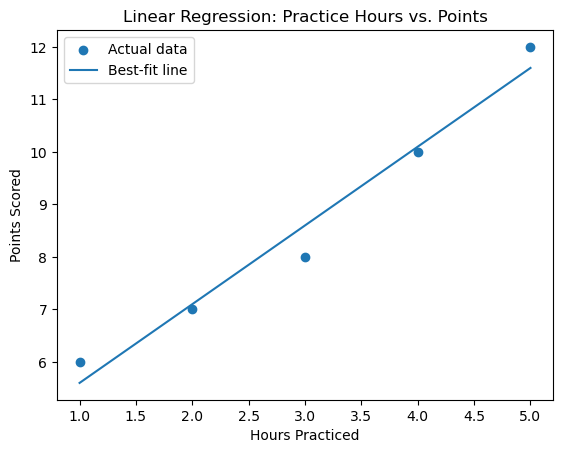

In [2]:
# Linear Regression with scikit-learn
# Example: predict basketball points from hours practiced

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1) Data (hours practiced -> points scored)
X = np.array([[1], [2], [3], [4], [5]])   # feature(s) must be 2D: shape (n_samples, n_features)
y = np.array([6, 7, 8, 10, 12])          # target: shape (n_samples,)

# 2) Create and fit the model
model = LinearRegression()
model.fit(X, y)

# 3) Inspect the learned line: y = m*x + b
m = model.coef_[0]        # slope
b = model.intercept_      # intercept

print(f"Learned equation: y = {m:.3f} * x + {b:.3f}")

# 4) Make a prediction (e.g., 6 hours of practice)
x_new = np.array([[6]])
y_pred_single = model.predict(x_new)[0]
print(f"Predicted points for 6 hours: {y_pred_single:.2f}")

# 5) Evaluate fit quality (R^2 and MSE) on the training data
y_pred = model.predict(X)
print(f"R^2: {r2_score(y, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y, y_pred):.3f}")

# 6) (Optional) Plot the data and the best-fit line
import matplotlib.pyplot as plt

plt.scatter(X, y, label="Actual data")
# Create a smooth line across the observed x-range
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.plot(x_line, y_line, label="Best-fit line")
plt.xlabel("Hours Practiced")
plt.ylabel("Points Scored")
plt.title("Linear Regression: Practice Hours vs. Points")
plt.legend()
plt.show()

## Linear regression with NumPy

In [8]:
import numpy as np

In [2]:
# Suppose we have some data
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Reshape X to be a two-dimensional array for matrix operations
X = X.reshape(-1, 1)

# Add a column of ones to X for the intercept
X_bias = np.hstack([np.ones((X.shape[0], 1)), X])

# Compute beta using OLS formula: (X^T X)^(-1) X^T y
beta = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

# beta[0] is intercept, beta[1] is slope
print("Intercept:", beta[0])
print("Slope:", beta[1])

# Make predictions
y_pred = X_bias @ beta
print("Predictions:", y_pred)

Intercept: 2.200000000000004
Slope: 0.6000000000000005
Predictions: [2.8 3.4 4.  4.6 5.2]


#### Key Points:
The above approach illustrates the math behind OLS, but in practice, we rely on libraries like scikit-learn for convenience and additional
functionality.

## Linear Regression with scikit-learn

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
# Dummy dataset
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
y = np.array([2, 4, 5, 4, 5, 6, 7, 8, 9, 10])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Extract coefficients
intercept = model.intercept_
slope = model.coef_[0]
print("Intercept:", intercept)
print("Slope:", slope)

# Predictions
y_pred = model.predict(X_test)
print("Predictions on test set:", y_pred)

# Performance evaluation (e.g., R^2 score)
r2 = model.score(X_test, y_test)
print("R^2 score on test set:", r2)

Intercept: 1.454545454545455
Slope: 0.818181818181818
Predictions on test set: [8.81818182 3.09090909 6.36363636 2.27272727]
R^2 score on test set: 0.9601452073839499


#### Key Points:
LinearRegression automatically handles the intercept term. Use model.coef_ and model.intercept_ to access parameters.
model.score() returns the R² (coefficient of determination), a measure of how well the regression line fits the data.

# Multiple Linear Regression

## **1. What is Multiple Linear Regression?**

Imagine you want to **predict** something — like your **math test score** — but it’s not just affected by one thing, it’s affected by **several factors**.

For example:

* **Hours you study**
* **Hours you sleep**
* **How many practice problems you do**

If we know these factors, we can use **Multiple Linear Regression** to **predict** your score.

It’s like saying:

$$
\text{Predicted Score} = a + b_1 \times (\text{Hours Studied}) + b_2 \times (\text{Hours Slept}) + b_3 \times (\text{Practice Problems})
$$

Here:

* $a$ = the **starting value** (score if you studied 0 hours, slept 0 hours, and did 0 problems — not realistic, but it’s the baseline)
* $b_1, b_2, b_3$ = **weights** (how much each factor affects your score)
* The numbers you plug in are your **data**.

---

## **2. Why is it called “Multiple”?**

Because **more than one factor** (or variable) is used to make the prediction.
If you only used **one** factor, that would be **Simple Linear Regression**.

---

## **3. A Real-Life Example**

Let’s say we collected data from 5 students:

| Hours Studied | Hours Slept | Practice Problems | Test Score |
| ------------- | ----------- | ----------------- | ---------- |
| 2             | 7           | 5                 | 65         |
| 4             | 6           | 12                | 78         |
| 3             | 8           | 10                | 80         |
| 5             | 7           | 15                | 88         |
| 6             | 5           | 20                | 90         |

Multiple Linear Regression will find the **best-fitting equation** that connects these three inputs to the score.

It might look like:

$$
\text{Score} = 40 + 5 \times (\text{Hours Studied}) + 3 \times (\text{Hours Slept}) + 1 \times (\text{Practice Problems})
$$

So if you:

* Study **4 hours**
* Sleep **6 hours**
* Do **12 problems**

You’d predict:

$$
\text{Score} = 40 + 5(4) + 3(6) + 1(12) = 40 + 20 + 18 + 12 = 90
$$

---

## **4. Key Ideas to Remember**

* It’s about **prediction**.
* More than **one variable** affects the result.
* The computer **calculates the best weights** for each factor so predictions are as accurate as possible.
* It assumes each factor affects the result in a **straight-line (linear)** way.

---

## **5. Visualizing It**

* In **Simple Linear Regression**, the graph is a **line** on a flat 2D graph.
* In **Multiple Linear Regression**, the graph is a **flat plane** (or even higher-dimensional surface) because there are more variables.
  

In [3]:
# If needed, install dependencies first (uncomment):
# !pip install scikit-learn pandas

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error

# ----------------------------
# 1) Make a small dataset
# ----------------------------
# Each row is a student:
# - hours_studied
# - hours_slept
# - practice_problems
# - test_score (the thing we want to predict)
data = [
    {"hours_studied": 2, "hours_slept": 7, "practice_problems": 5,  "test_score": 65},
    {"hours_studied": 4, "hours_slept": 6, "practice_problems": 12, "test_score": 78},
    {"hours_studied": 3, "hours_slept": 8, "practice_problems": 10, "test_score": 80},
    {"hours_studied": 5, "hours_slept": 7, "practice_problems": 15, "test_score": 88},
    {"hours_studied": 6, "hours_slept": 5, "practice_problems": 20, "test_score": 90},
]

df = pd.DataFrame(data)

# Features (inputs) and target (output)
feature_names = ["hours_studied", "hours_slept", "practice_problems"]
X = df[feature_names]
y = df["test_score"]

# ----------------------------
# 2) Split into train/test sets
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# ----------------------------
# 3) Fit the Multiple Linear Regression model
# ----------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ----------------------------
# 4) See the learned equation
# ----------------------------
intercept = model.intercept_
coeffs = model.coef_

print("Learned equation:")
terms = [f"{coeff:.3f}*{name}" for coeff, name in zip(coeffs, feature_names)]
print(f"test_score = {intercept:.3f} + " + " + ".join(terms))

# ----------------------------
# 5) Evaluate on the test set
# ----------------------------
y_pred = model.predict(X_test)
print("\nPerformance on test set:")
print(f"R^2: {r2_score(y_test, y_pred):.3f}")          # closer to 1.0 is better
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")  # lower is better

# ----------------------------
# 6) Make a prediction for a new student
# ----------------------------
new_student = pd.DataFrame(
    {"hours_studied": [4], "hours_slept": [6], "practice_problems": [12]}
)
predicted_score = model.predict(new_student)[0]
print("\nPrediction for student (studied=4, slept=6, problems=12):")
print(f"Predicted test score = {predicted_score:.1f}")

Learned equation:
test_score = 32.164 + -0.791*hours_studied + 3.104*hours_slept + 2.537*practice_problems

Performance on test set:
R^2: 0.811
MAE: 1.881

Prediction for student (studied=4, slept=6, problems=12):
Predicted test score = 78.1


In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
# Expanded dataset with 10 rows
data = pd.DataFrame({
    'X1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'X2': [2, 3, 1, 5, 4, 6, 7, 8, 6, 9],
    'y':  [3, 5, 4, 7, 6, 8, 9, 10, 9, 12]
})

# Feature matrix and target
X = data[['X1', 'X2']]
y = data['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Output model parameters and test score
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R^2 on test set:", model.score(X_test, y_test))

Intercept: 1.6097560975609744
Coefficients: [0.52439024 0.54878049]
R^2 on test set: 0.8912477691850085


#### Key Points:
The model.coef_ now returns an array of coefficients, one for each predictor, describing the relationship between that predictor and the
response variable when other predictors are held constant.

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

MSE: 0.43500892325996615
MAE: 0.6585365853658551
R²: 0.8912477691850085


## **Linear Regression Assumptions**

When we use **linear regression** to predict something (like predicting a student’s test score from the hours they study), the method works best when some **rules** (assumptions) are true. If these rules are broken, our predictions might be **less accurate**.

---

### 1️⃣ **Linearity**

**Meaning:** The relationship between the input (predictors) and the output (response) is a straight-line relationship.

**Example:**
If studying 1 extra hour increases your score by about the same amount no matter how many hours you’ve already studied, the relationship is **linear**.
But if studying more helps at first but then makes almost no difference after a certain point, the relationship might be **non-linear**.

**Why it matters:** Linear regression draws a straight line. If the real relationship is curved, the line won’t fit well.

**Note:** 
The left shows a straight-line relationship between study hours and test scores, while the right shows a curved (non-linear) relationship.


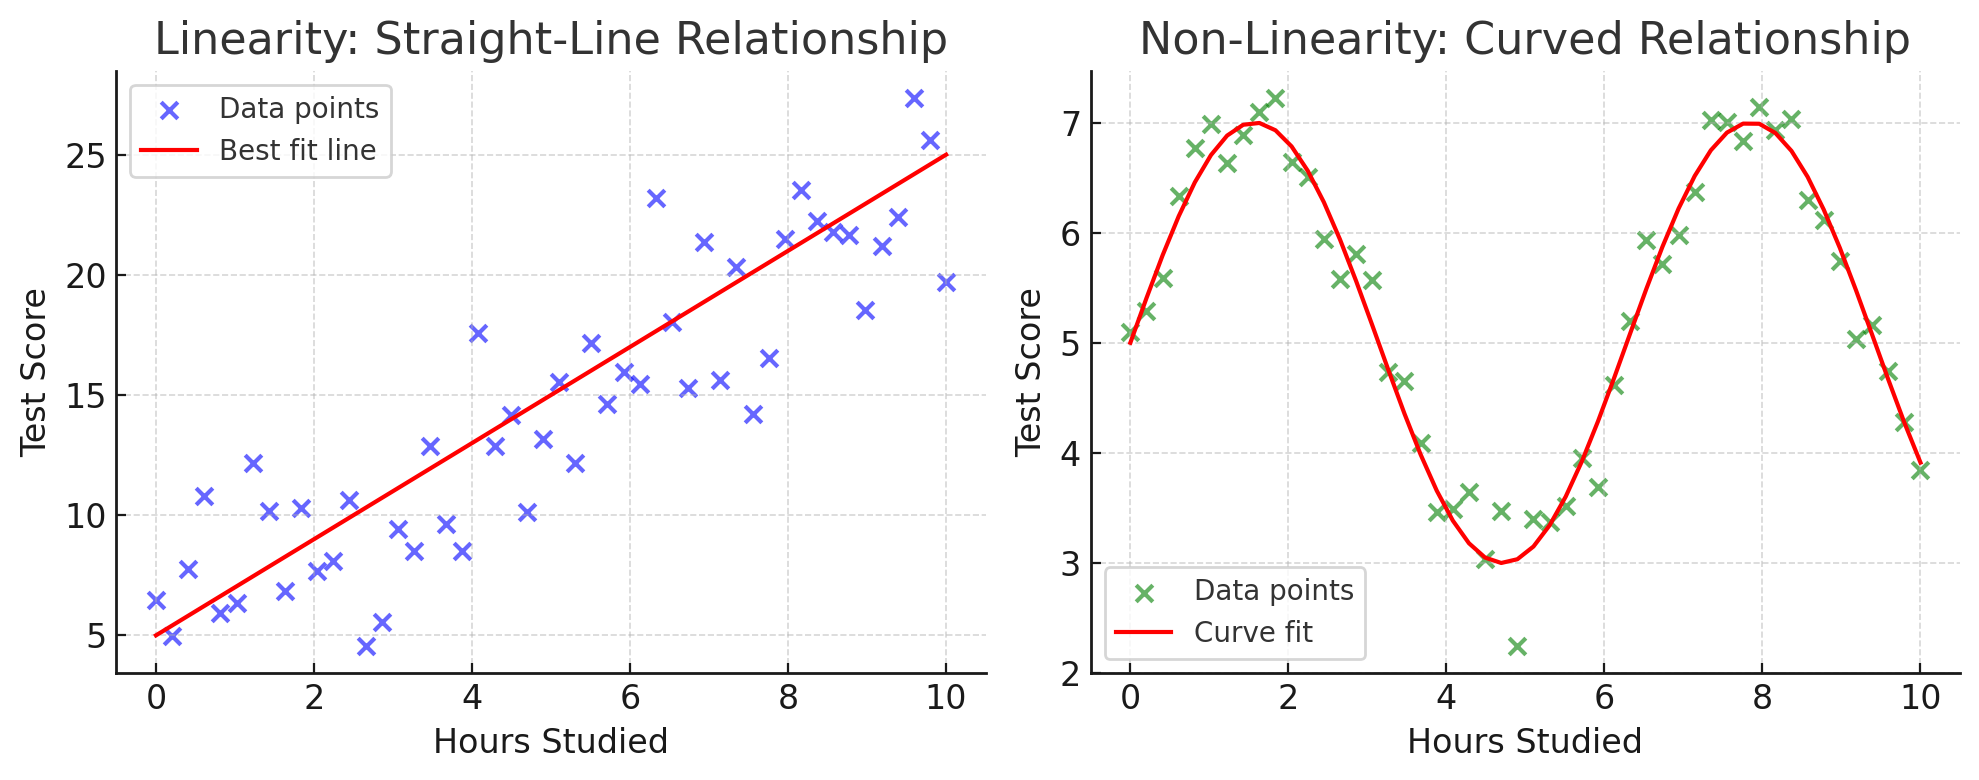

---

### 2️⃣ **Independence of Errors**

**Meaning:** The prediction mistakes (errors) shouldn’t be related to each other.

**Example:**
If you’re predicting today’s temperature from yesterday’s, and your errors are related (e.g., if you were wrong yesterday in a certain way, you’re also wrong today in the same way), then the errors are **not independent**.

**Why it matters:** If errors are connected, the model can be tricked into thinking it’s more accurate than it really is.

**Note:**:
* **Left**: Errors are scattered randomly with no clear pattern (independent).
* **Right**: Errors follow a wave-like pattern, meaning they are related to each other (dependent). 

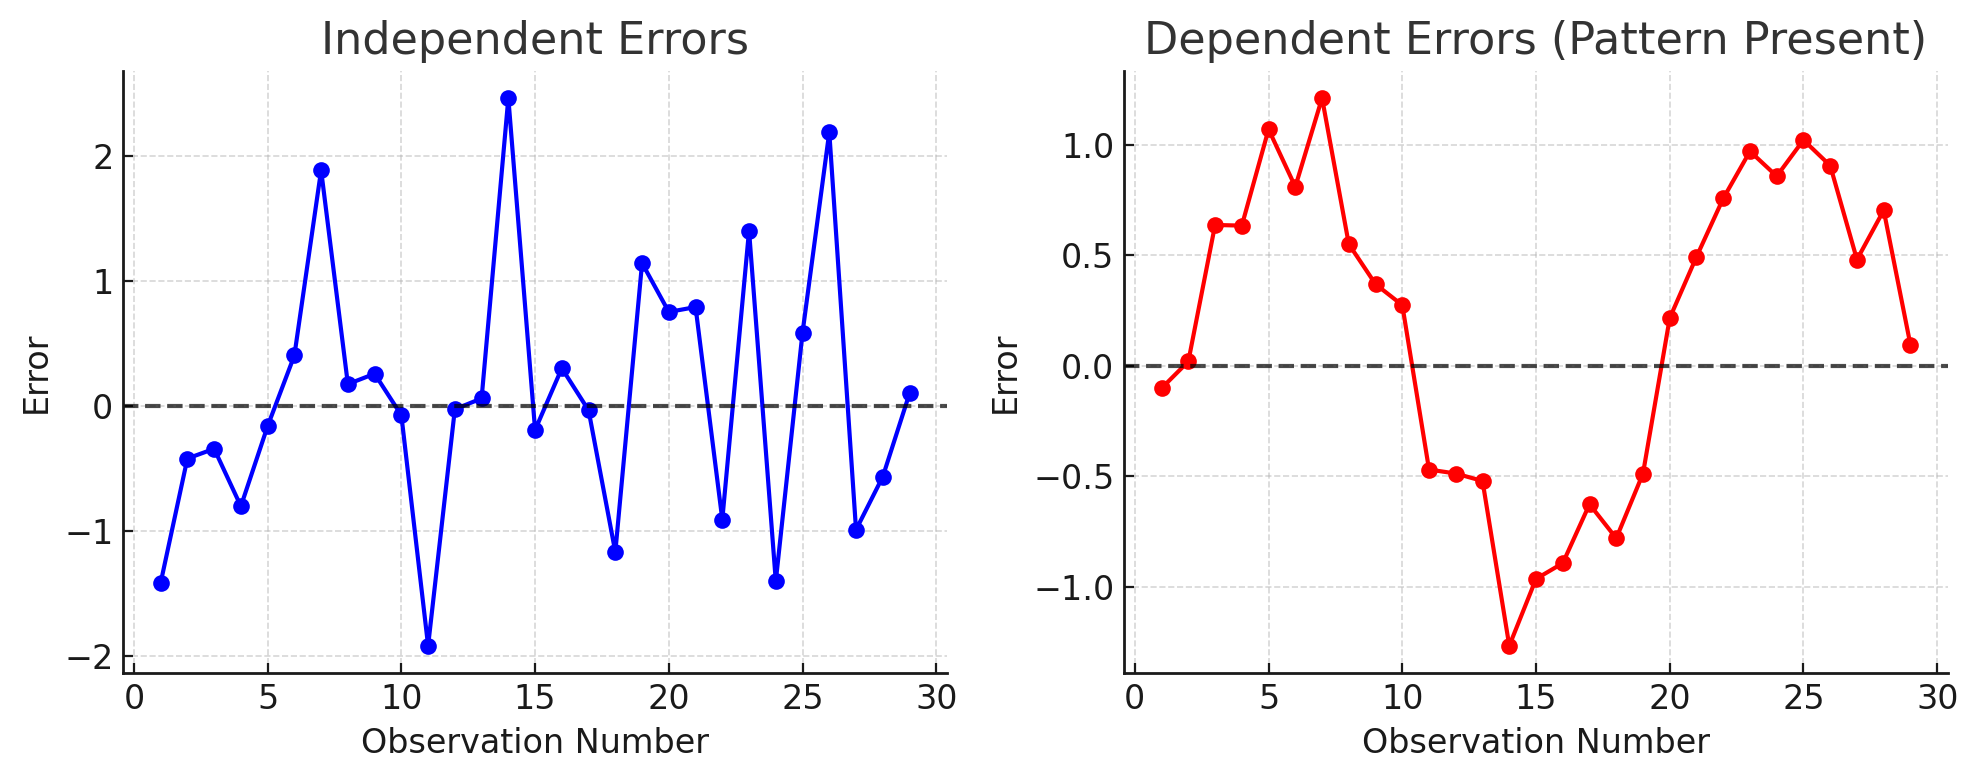

---

### 3️⃣ **Homoscedasticity** (constant variance)

**Meaning:** The prediction errors should be spread out about the same amount, no matter what the predicted value is.

**Example:**
If you predict scores for both high-achieving and low-achieving students, the **amount of scatter** of errors should be about the same for both groups.
If high-achievers have tiny errors and low-achievers have huge errors, the assumption is broken.

**Why it matters:** Unequal spread (heteroscedasticity) can make the model’s predictions unreliable, especially for certain ranges.

**Note**:
* **Left**: The spread of points around the line is about the same everywhere (**homoscedasticity**).
* **Right**: The spread gets bigger as X increases (**heteroscedasticity**), meaning the errors grow with the predictor.

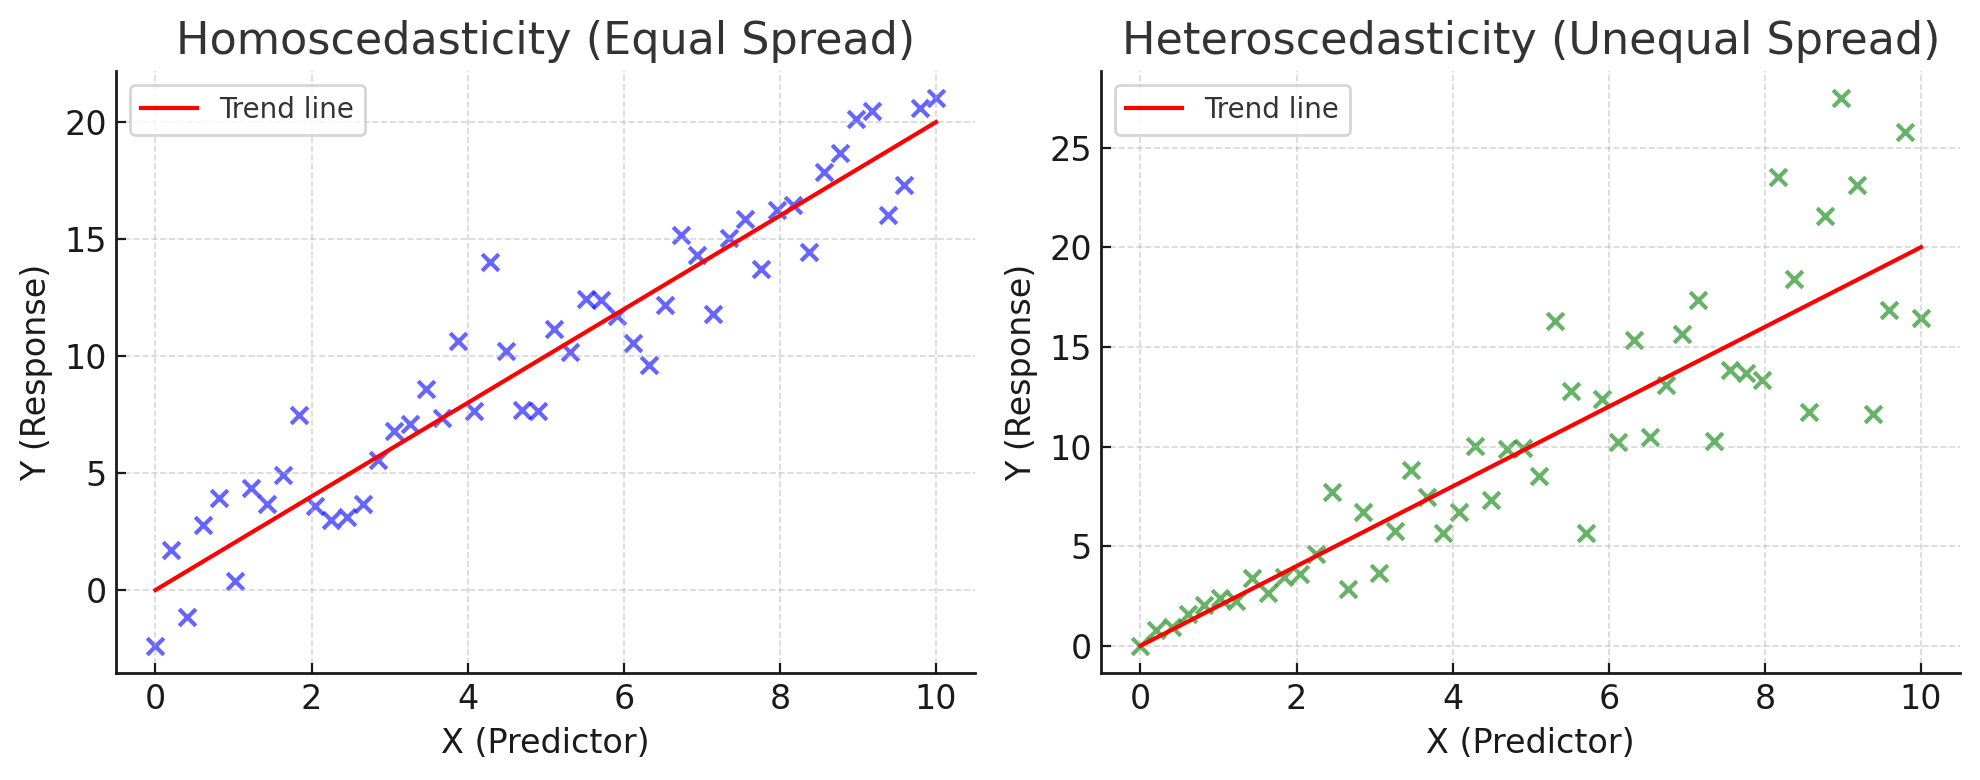
---

### 4️⃣ **Normality of Errors**

**Meaning:** The prediction mistakes should follow a **bell-shaped curve** (normal distribution) when you look at them all together.

**Example:**
If you look at all your prediction errors for students’ scores, most should be small (close to zero), and big errors (either too high or too low) should be rare. This creates a bell shape when plotted.

**Why it matters:** Normal errors make it easier to trust the model’s statistics, like confidence intervals and p-values.

**Note:**
* **Left**: Errors form a **bell-shaped curve** (normal distribution), meaning most errors are small and close to zero.
* **Right**: Errors are **skewed**, meaning the distribution is lopsided and doesn’t follow a normal curve.
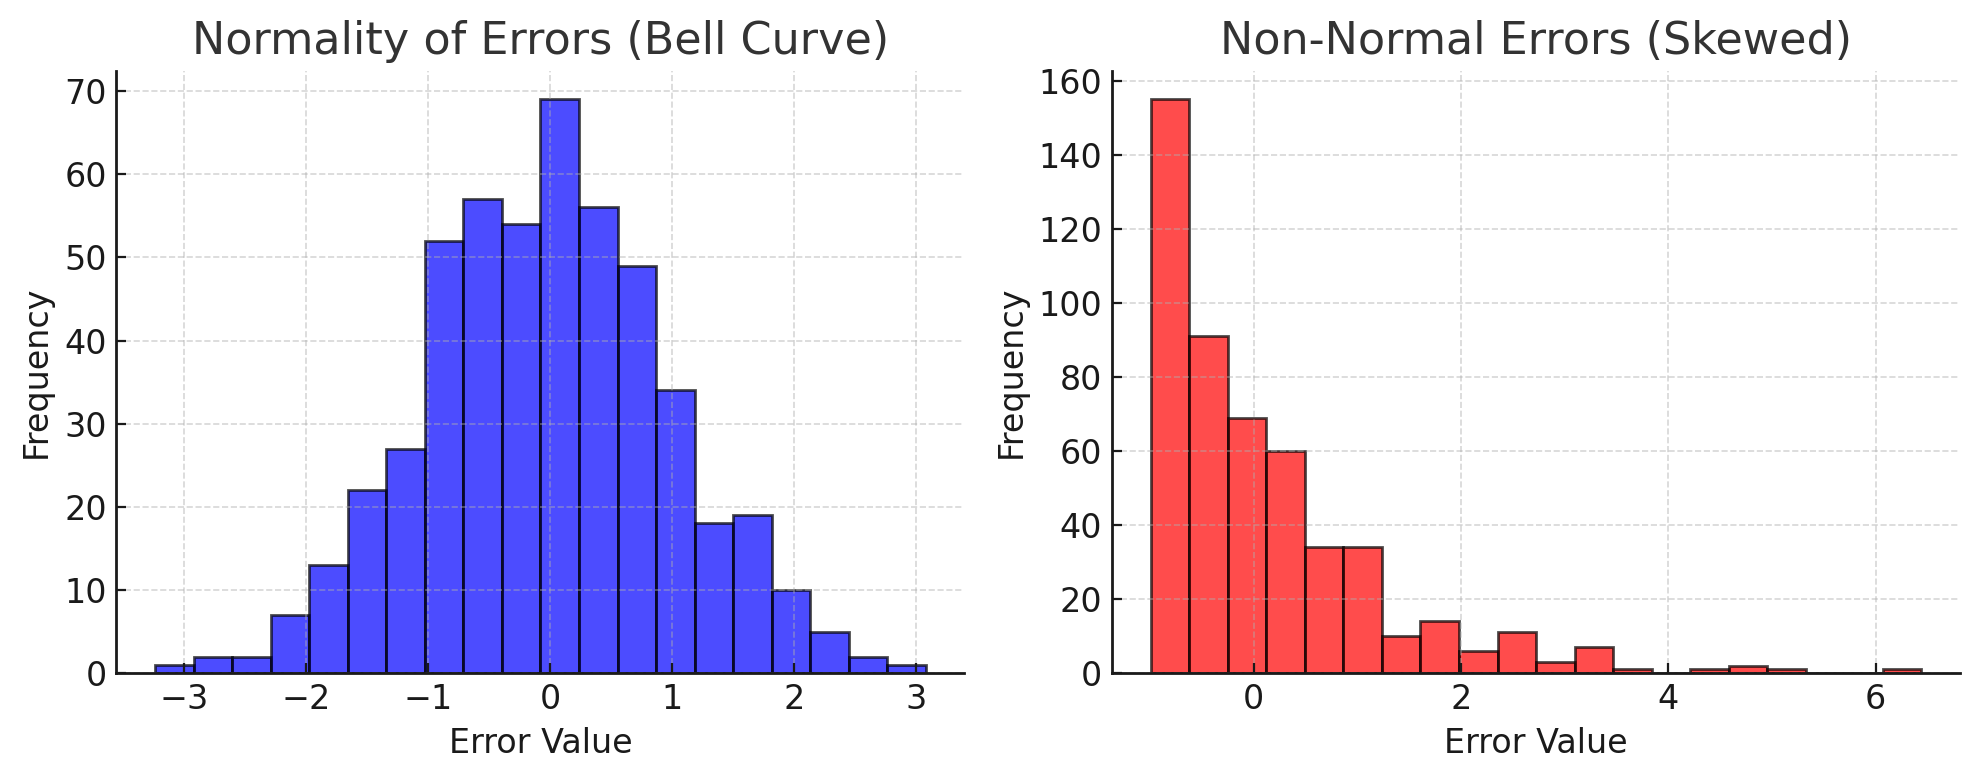
---

### 5️⃣ **Lack of Multicollinearity**

**Meaning:** The predictors (independent variables) shouldn’t be too similar to each other.

**Example:**
If you try to predict a score using both **hours studied** and **pages read**, but pages read is almost always proportional to hours studied, then the model gets confused about which one is actually affecting the score.

**Why it matters:** When predictors are very similar, the model can’t figure out their individual contributions, making the results unstable.

**Note:**
* **Left**: Predictors X1 and X2 are scattered without a clear pattern — they are **not related**.
* **Right**: Predictors X1 and X2 follow a strong straight-line relationship — they are **highly correlated**, which can confuse the regression model.

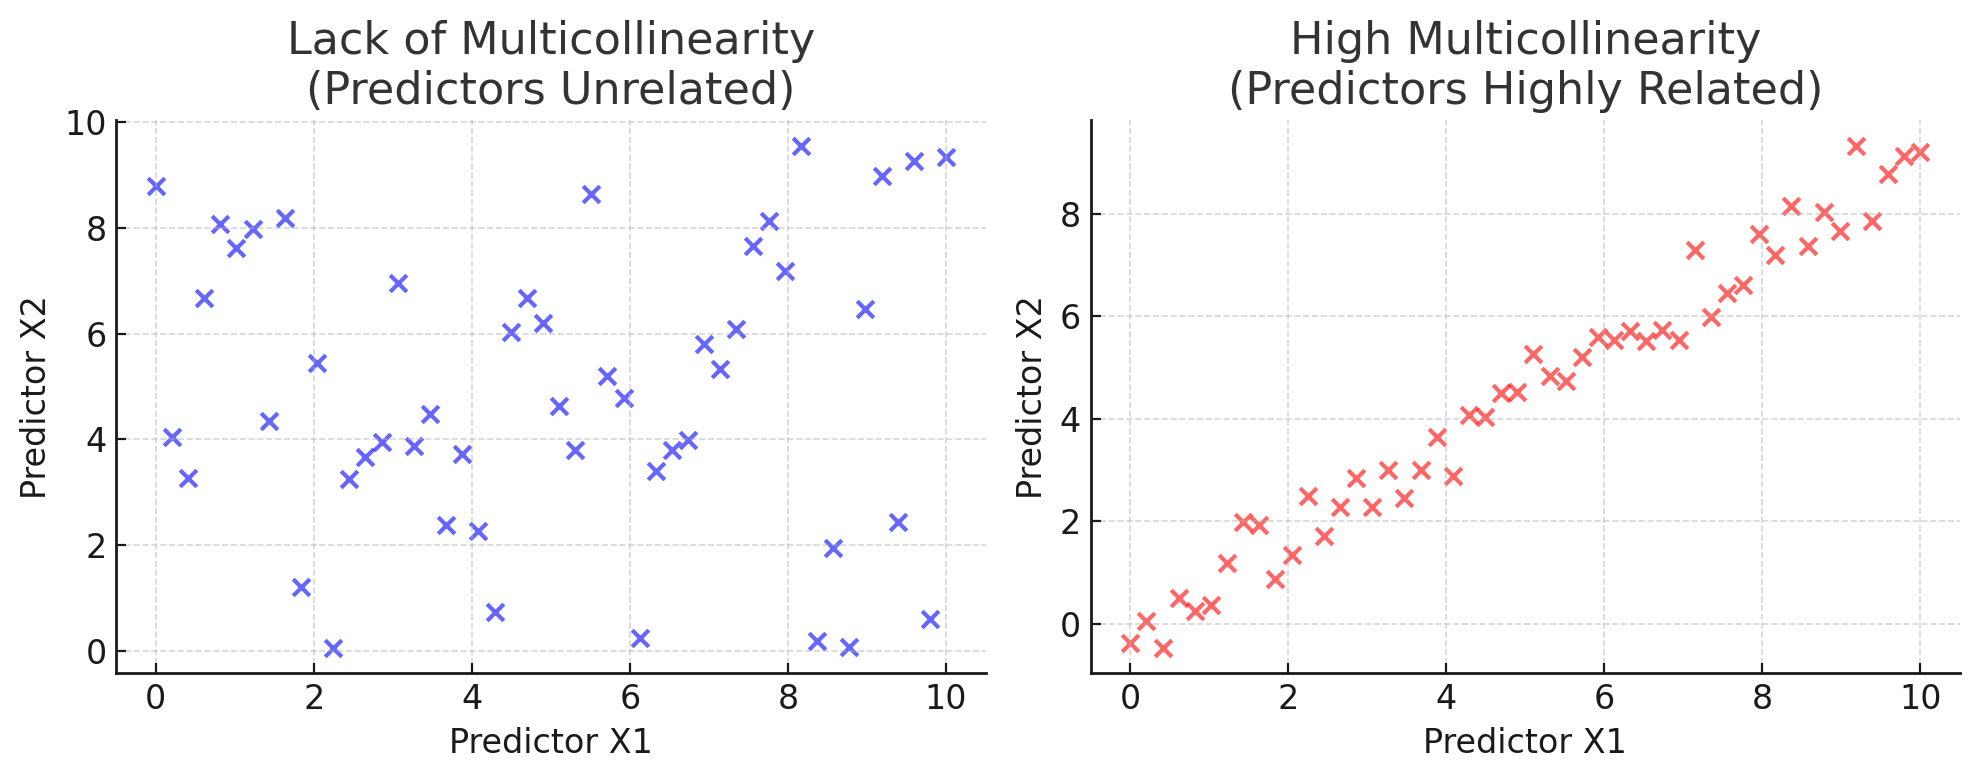
---

### 🎯 **In Short**

| Assumption                    | Simple Meaning                  | Real-Life Analogy                                                    |
| ----------------------------- | ------------------------------- | -------------------------------------------------------------------- |
| **Linearity**                 | Relationship is a straight line | Each extra hour of study always boosts your score by the same amount |
| **Independence of Errors**    | Mistakes are unrelated          | Today’s weather forecast errors don’t depend on yesterday’s          |
| **Homoscedasticity**          | Errors have equal spread        | All groups of students have similar prediction error sizes           |
| **Normality of Errors**       | Errors follow a bell curve      | Most guesses are close to right; big misses are rare                 |
| **Lack of Multicollinearity** | Predictors aren’t duplicates    | Hours studied and pages read aren’t just measuring the same thing    |

# Diagnostic Checks:
* Residual Plots: Plot residuals vs. predicted values to check for patterns or non-linearity.
* Q-Q Plot: Check normality of residuals.
* Variance Inflation Factor (VIF): Quantify multicollinearity among predictors.

If assumptions are violated, consider:
Transforming variables.
Using polynomial terms for non-linearity.
Employing regularization methods (Ridge, Lasso) if
multicollinearity is a concern

# **Residual Plots** 
## 1. The Big Idea

Imagine you’re trying to predict something — for example:

> "How many hours a student studies" → "What score they get on a test."

You might draw a **best-fit line** (or curve) through your data to make predictions.
But your line won’t be perfect — some points will be above it, some below it.

The **residual** is just:

$$
\text{Residual} = \text{Actual Value} - \text{Predicted Value}
$$

It’s the **error** — how far off your prediction was.

---

## 2. What’s a Residual Plot?

A **Residual Plot** is a graph where:

* **X-axis**: The predicted value (or sometimes the actual x-value in your data)
* **Y-axis**: The residual (the error)

Each point shows **how wrong the prediction was** for that data point.

---

## 3. Why Use a Residual Plot?

Residual plots help you check **if your model is a good fit**.

Think of it like this:

| **Residual Plot Pattern**                        | **What it Means**                                                                       |
| ------------------------------------------------ | --------------------------------------------------------------------------------------- |
| Residuals look random, scattered evenly around 0 | ✅ Good model — no obvious bias.                                                         |
| Residuals form a curve                           | ❌ Your line missed a pattern — maybe you need a curved model instead.                   |
| Residuals get bigger as x increases (fan shape)  | ❌ Your predictions get less accurate for larger x — maybe your data has unequal spread. |
| Residuals are mostly above or below zero         | ❌ Your model is consistently overpredicting or underpredicting.                         |

---

## 4. Example (Simple Numbers)

Let’s say you predict scores based on hours studied:

| Hours Studied | Actual Score | Predicted Score | Residual |
| ------------- | ------------ | --------------- | -------- |
| 1             | 60           | 65              | -5       |
| 2             | 70           | 75              | -5       |
| 3             | 80           | 78              | +2       |
| 4             | 85           | 88              | -3       |

A residual plot for this would put:

* X-axis = predicted score
* Y-axis = residual

If the points are scattered evenly around 0, your model is doing fine.

---

## 5. Quick Visual in Words

Imagine your data is like arrows hitting near a bullseye (the prediction line).
A residual plot is like **plotting where the arrows land relative to the bullseye**:

* Random scatter around the center → good
* Pattern in the misses → bad (your aim is biased)

 Hours  ActualScore  PredictedScore  Residual (Actual - Predicted)
   1.0         63.0            66.3                           -3.3
   2.0         72.5            71.9                            0.6
   3.0         77.6            77.5                            0.2
   4.0         82.5            83.0                           -0.5
   5.0         92.7            88.6                            4.1
   6.0         98.0            94.2                            3.9
   7.0        100.0            99.7                            0.3
   8.0        100.0           105.3                           -5.3


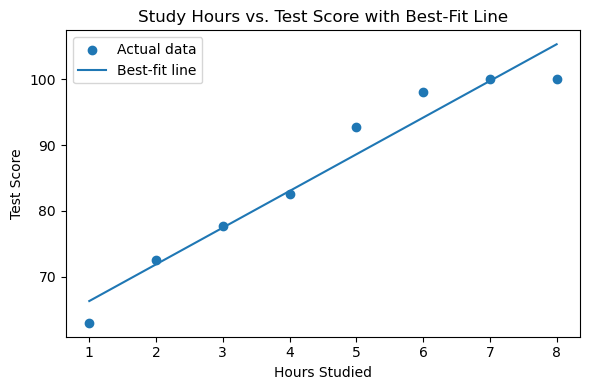

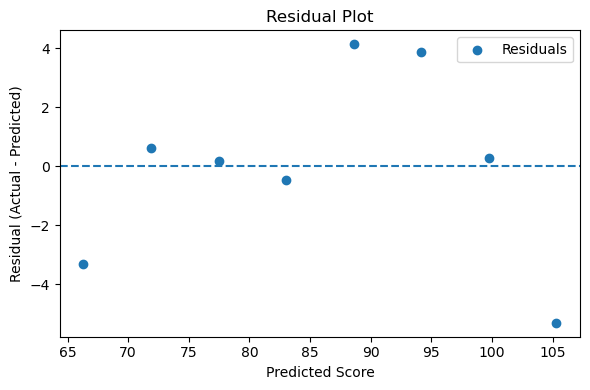

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Hours studied (x) and (simulated) test scores (y)
rng = np.random.default_rng(7)
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8], dtype=float)
true_scores = 55 + 8 * hours
noise = rng.normal(loc=0, scale=5, size=hours.size)
scores = np.clip(true_scores + noise, 0, 100)

# Fit a straight line (y = m*x + b)
m, b = np.polyfit(hours, scores, deg=1)
predicted = m * hours + b

# Residuals
residuals = scores - predicted

# Show a quick table
df = pd.DataFrame({
    "Hours": hours,
    "ActualScore": np.round(scores, 1),
    "PredictedScore": np.round(predicted, 1),
    "Residual (Actual - Predicted)": np.round(residuals, 1)
})
print(df.to_string(index=False))

# Plot: data + best-fit line
plt.figure(figsize=(6, 4))
plt.scatter(hours, scores, label="Actual data")
xs = np.linspace(hours.min(), hours.max(), 100)
ys = m * xs + b
plt.plot(xs, ys, label="Best-fit line")
plt.xlabel("Hours Studied")
plt.ylabel("Test Score")
plt.title("Study Hours vs. Test Score with Best-Fit Line")
plt.legend()
plt.tight_layout()
plt.show()

# Residual plot
plt.figure(figsize=(6, 4))
plt.scatter(predicted, residuals, label="Residuals")
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted Score")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.legend()
plt.tight_layout()
plt.show()

#  Q-Q Plot
## **1. What is a Q–Q Plot?**

A **Q–Q Plot** stands for **Quantile–Quantile Plot**.
It’s a type of graph that helps us check if our data follows a certain shape, usually a **normal distribution** (the famous bell curve).

Think of it as:

> A way to compare your data’s shape to a “perfect” shape.

---

## **2. Why do we use it?**

* To **see if data is normal** (important for many math, science, and statistics methods).
* To **spot unusual patterns** (maybe the data is skewed or has extreme values).
* To **compare two data sets** to see if they have similar distributions.

---

## **3. How it works (in simple steps)**

1. **Sort your data** from smallest to largest.
2. **Find quantiles** (special “cut points” that split the data into equal parts, like quarters, percentiles, etc.).
3. **Compare your data’s quantiles** to the quantiles of the “ideal” distribution (e.g., perfect normal distribution).
4. **Plot them on a graph**:

   * **X-axis** → ideal distribution quantiles
   * **Y-axis** → your data’s quantiles

---

## **4. How to read it**

* If the dots **line up roughly along a straight diagonal line**, your data matches the ideal shape (e.g., normal).
* If the dots **curve upward or downward**, your data is skewed.
* If the dots are **far from the line**, your data has outliers or is very different from the ideal.

---

## **5. Example**

Imagine you measure the height of 100 high school students and make a Q–Q plot against a normal distribution:

* If heights are normally distributed → dots form a straight diagonal.
* If there are a few super short or super tall students → dots at the ends bend away.
* If most students are either short or tall but few in the middle → dots curve a lot.

---

## **6. A simple analogy**

Think of it like comparing two sets of test scores:

* One is from your class.
* One is from a class that always scores in a perfect “bell curve” pattern.
* If your class’s score rankings match theirs perfectly, the dots line up straight.
* If not, the line bends or has bumps.

---

✅ **Summary:**
A **Q–Q Plot** is a visual check to see if your data’s shape matches an expected distribution. Straight line = good match, curved = different shape.

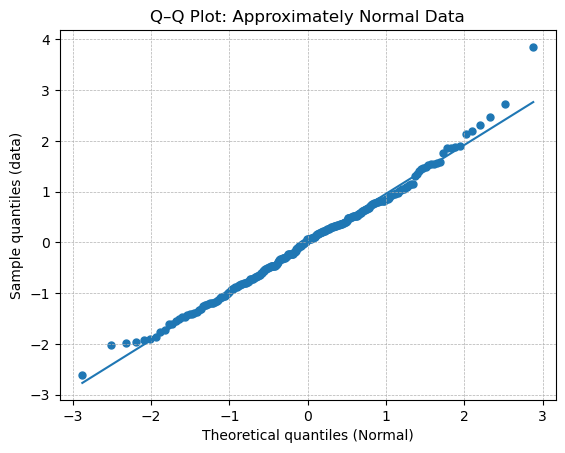

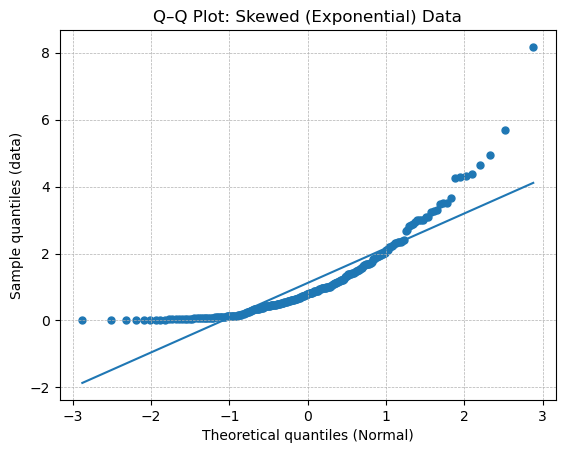

In [5]:
# Q–Q Plot demo: two figures (normal vs. skewed)
# - Each plot compares sample quantiles to Normal-theory quantiles.
# - No seaborn; one chart per figure; no explicit colors.

import numpy as np
import matplotlib.pyplot as plt

def _normal_quantiles(probabilities):
    """Return Normal(0,1) quantiles for given probabilities in (0,1)."""
    try:
        from scipy.stats import norm
        return norm.ppf(probabilities)
    except Exception:
        # Fallback approximation if SciPy isn't available
        big = np.random.normal(size=500_000)
        big.sort()
        idx = np.clip((probabilities * (big.size - 1)).astype(int), 0, big.size - 1)
        return big[idx]

def qq_plot_against_normal(data, title):
    """Q–Q plot of 'data' vs. Normal distribution, with fitted reference line."""
    data = np.asarray(data)
    if data.size < 2:
        raise ValueError("Need at least 2 data points.")

    # 1) Sample quantiles: sort the data
    y = np.sort(data)

    # 2) Plotting positions p_i = (i - 0.5)/n
    n = y.size
    i = np.arange(1, n + 1)
    p = (i - 0.5) / n

    # 3) Theoretical Normal quantiles
    x = _normal_quantiles(p)

    # 4) Fit y = a*x + b as a visual guide
    a, b = np.polyfit(x, y, 1)

    # 5) Plot
    plt.figure()
    plt.scatter(x, y, s=25)      # no explicit color/style
    x_line = np.array([x.min(), x.max()])
    y_line = a * x_line + b
    plt.plot(x_line, y_line)
    plt.title(title)
    plt.xlabel("Theoretical quantiles (Normal)")
    plt.ylabel("Sample quantiles (data)")
    plt.grid(True, linestyle="--", linewidth=0.5)
    plt.show()

# ----- Example 1: Approximately Normal data -----
np.random.seed(42)
normal_data = np.random.normal(loc=0.0, scale=1.0, size=250)
qq_plot_against_normal(normal_data, "Q–Q Plot: Approximately Normal Data")

# ----- Example 2: Skewed data (Exponential) -----
skewed_data = np.random.exponential(scale=1.0, size=250)
qq_plot_against_normal(skewed_data, "Q–Q Plot: Skewed (Exponential) Data")

# **Variance Inflation Factor (VIF)** 
## **1. What is VIF in simple words?**

VIF tells us **if one of our predictors (independent variables) in a regression is too similar to the others**.
When two predictors give almost the same information, they "overlap" too much — this is called **multicollinearity**.
High multicollinearity can mess up our regression model.

Think of it like a group project:

* If two people do exactly the same research, you don’t gain much extra knowledge from having both.
* In statistics, that “duplicate” information makes it harder to see how each variable really affects the result.

---

## **2. Why does it matter?**

If multicollinearity is high:

* Your model's predictions might still work, **but**
* It will be harder to trust the *individual* coefficients (the "importance" of each variable).
* Small changes in the data can cause big swings in results.

---

## **3. How VIF works**

The **Variance Inflation Factor** measures how much the variance (spread) of a coefficient is “inflated” because of collinearity with other predictors.

Formula:

$$
VIF = \frac{1}{1 - R^2}
$$

* $R^2$ here is found by predicting one variable using all the others.
* If $R^2$ is high (close to 1), that variable is very predictable from the others → **VIF will be high**.

---

## **4. What do the numbers mean?**

| **VIF Value** | **Meaning**                                   |
| ------------- | --------------------------------------------- |
| 1             | No overlap (good)                             |
| 1–5           | Moderate overlap (usually fine)               |
| > 5           | High overlap (might be a problem)             |
| > 10          | Very high overlap (serious multicollinearity) |

---

## **5. An analogy**

Imagine you're buying snacks for a party:

* You buy **chips** and **crisps** — but they’re basically the same thing.
  (VIF would be high because crisps give the same “snack information” as chips.)
* You buy **chips** and **cookies** — completely different snacks.
  (VIF would be low because they give different information.)

---

## **6. A tiny example**

Let’s say you want to predict **exam scores** using:

1. Hours studied
2. Number of practice problems solved
3. Hours slept

If “Hours studied” and “Number of practice problems” are almost perfectly related (e.g., you solve 10 problems for every hour studied),
VIF for one of them will be **very high** — because one can almost perfectly predict the other.



=== Sample of the dataset (first 10 rows) ===
 exam_score  hours_studied  practice_problems  hours_slept
  74.111359       5.745071          61.405872     6.207479
  70.088836       4.792604          43.379098     6.885264
  77.819148       5.971533          66.729300     7.504987
  89.063951       7.284545          65.836193     7.865755
  63.569046       4.648770          49.421985     5.799704
  63.115228       4.648795          57.440224     6.665499
  85.529195       7.368819          68.735511     6.525055
  73.613897       6.151152          58.680032     6.346671
  65.596316       4.295788          43.456141     8.765454
  69.919243       5.813840          55.621022     7.404982

=== Correlation between predictors ===
                   hours_studied  practice_problems  hours_slept
hours_studied           1.000000           0.943761    -0.109686
practice_problems       0.943761           1.000000    -0.058111
hours_slept            -0.109686          -0.058111     1.000000


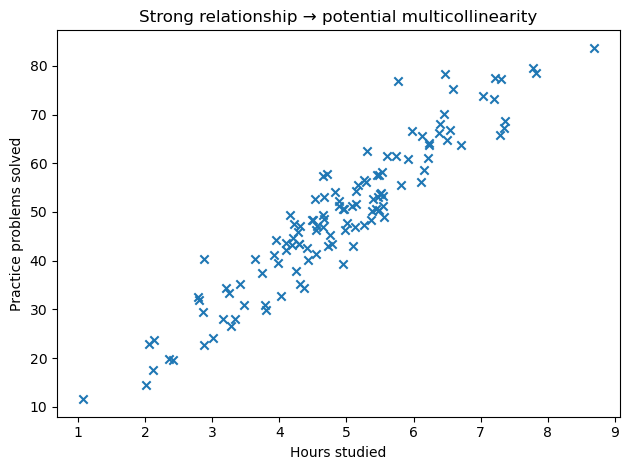


=== VIF values for predictors ===
                          VIF
feature                      
hours_studied      114.786687
practice_problems  104.724209
hours_slept         10.335516


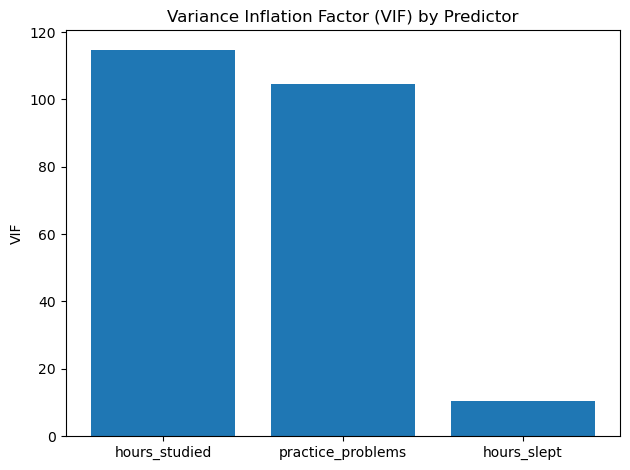


=== Linear regression coefficients (all predictors) ===
     hours_studied:  6.4201
 practice_problems:  0.2412
       hours_slept:  2.6786
         intercept:  3.4004

=== Coefficients without 'practice_problems' ===
     hours_studied:  8.9323
       hours_slept:  2.8641

=== Coefficients without 'hours_studied' ===
 practice_problems:  0.7914
       hours_slept:  2.1401

Plain-English takeaways:
• VIF measures how much a predictor overlaps with others. Higher VIF ⇒ more overlap (multicollinearity).
• In this data, 'hours_studied' and 'practice_problems' are very similar, so their VIFs are high.
• When we include both, their individual coefficients can look unstable or counterintuitive.
• Removing one of the overlapping predictors often makes the remaining coefficients easier to interpret.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


def main(seed: int = 42, n: int = 120) -> None:
    # ---------- 1) Make a small, realistic dataset ----------
    np.random.seed(seed)

    # "Hours studied" is our main study variable
    hours_studied = np.random.normal(loc=5, scale=1.5, size=n).clip(0, None)

    # "Practice problems" is highly related to "hours studied"
    # (e.g., roughly 10 problems per hour, with a little random noise)
    practice_problems = 10 * hours_studied + np.random.normal(loc=0, scale=5, size=n)

    # "Hours slept" the night before the exam is more independent
    hours_slept = np.random.normal(loc=7, scale=1, size=n).clip(0, None)

    # Create an exam score that is affected by all three (with some noise)
    # True (hidden) model used to generate data:
    # score = 6*(hours_studied) + 0.3*(practice_problems) + 3*(hours_slept) + noise
    noise = np.random.normal(loc=0, scale=5, size=n)
    exam_score = 6*hours_studied + 0.3*practice_problems + 3*hours_slept + noise

    df = pd.DataFrame({
        "exam_score": exam_score,
        "hours_studied": hours_studied,
        "practice_problems": practice_problems,
        "hours_slept": hours_slept
    })

    print("\n=== Sample of the dataset (first 10 rows) ===")
    print(df.head(10).to_string(index=False))

    # ---------- 2) Look at the correlation between the predictors ----------
    corr = df[["hours_studied", "practice_problems", "hours_slept"]].corr()
    print("\n=== Correlation between predictors ===")
    print(corr.to_string())

    # Scatter plot to show how similar "hours_studied" and "practice_problems" are
    plt.figure()
    plt.scatter(df["hours_studied"], df["practice_problems"], marker='x')
    plt.xlabel("Hours studied")
    plt.ylabel("Practice problems solved")
    plt.title("Strong relationship → potential multicollinearity")
    plt.tight_layout()
    plt.show()

    # ---------- 3) Compute VIF ----------
    # VIF requires a design matrix (X) without the target variable
    X = df[["hours_studied", "practice_problems", "hours_slept"]].copy()

    vif_data = []
    for i, col in enumerate(X.columns):
        # statsmodels' variance_inflation_factor expects a numpy array
        vif_value = variance_inflation_factor(X.values, i)
        vif_data.append({"feature": col, "VIF": float(vif_value)})

    vif_df = pd.DataFrame(vif_data).set_index("feature")
    print("\n=== VIF values for predictors ===")
    print(vif_df.to_string())

    # Bar chart for VIF values
    plt.figure()
    plt.bar(vif_df.index, vif_df["VIF"].values)
    plt.ylabel("VIF")
    plt.title("Variance Inflation Factor (VIF) by Predictor")
    plt.tight_layout()
    plt.show()

    # ---------- 4) Fit a linear regression and inspect coefficients ----------
    y = df["exam_score"].values

    # Fit with all three predictors
    linreg = LinearRegression()
    linreg.fit(X, y)

    print("\n=== Linear regression coefficients (all predictors) ===")
    for name, coef in zip(X.columns, linreg.coef_):
        print(f"{name:>18}: {coef: .4f}")
    print(f"{'intercept':>18}: {linreg.intercept_: .4f}")

    # Also fit two simpler models to show how coefficients change when multicollinearity is removed
    # (a) Using "hours_studied" and "hours_slept" only
    X_a = df[["hours_studied", "hours_slept"]].values
    linreg_a = LinearRegression().fit(X_a, y)
    print("\n=== Coefficients without 'practice_problems' ===")
    for name, coef in zip(["hours_studied", "hours_slept"], linreg_a.coef_):
        print(f"{name:>18}: {coef: .4f}")

    # (b) Using "practice_problems" and "hours_slept" only
    X_b = df[["practice_problems", "hours_slept"]].values
    linreg_b = LinearRegression().fit(X_b, y)
    print("\n=== Coefficients without 'hours_studied' ===")
    for name, coef in zip(["practice_problems", "hours_slept"], linreg_b.coef_):
        print(f"{name:>18}: {coef: .4f}")

    # ---------- 5) Plain-English takeaways ----------
    print("\nPlain-English takeaways:")
    print("• VIF measures how much a predictor overlaps with others. Higher VIF ⇒ more overlap (multicollinearity).")
    print("• In this data, 'hours_studied' and 'practice_problems' are very similar, so their VIFs are high.")
    print("• When we include both, their individual coefficients can look unstable or counterintuitive.")
    print("• Removing one of the overlapping predictors often makes the remaining coefficients easier to interpret.")

main()

# Regularization
While plain linear regression can overfit if you have too many
features, regularization methods like Ridge and Lasso add a penalty
term to the regression, shrinking coefficients and potentially
improving generalization.


# **Ridge Regression** 
## 1. **What’s Regression?**

Imagine you’re trying to **predict** something — say, your math test score — based on how many hours you study.

* If you plot points on a graph and draw the best-fitting straight line, that’s **linear regression**.
* The line tries to be **as close as possible** to all the data points.

---

## 2. **The Problem with Regular Regression**

Sometimes you have:

* **Too many factors** (study hours, hours of sleep, number of snacks, mood, etc.).
* **Similar factors** (study hours at school and at home might be almost the same).

When this happens:

* The line (or plane, or curve) can fit the data **too perfectly** but make **bad predictions** on new data.
* This is called **overfitting** — like memorizing answers instead of actually learning the topic.

---

## 3. **What Ridge Regression Does**

Ridge Regression is just **regular regression with a small twist**:

* It still tries to find the best-fitting line…
* **BUT** it adds a rule: **“Don’t let the slope values get too big.”**

Mathematically, it adds a **penalty** for large coefficients (slopes).

* This penalty is called **L2 regularization**.

---

## 4. **Why Does This Help?**

Think of predicting your test score:

* Without Ridge: the equation might say `Score = 10 × study_hours + 5 × sleep_hours – 3 × snacks`
* Those numbers (10, 5, -3) might get huge if the data is tricky.
* With Ridge: we tell the computer, *“Find good numbers, but keep them small unless absolutely necessary.”*

Small numbers mean:

* Each factor matters a bit, but no single factor dominates too much.
* Predictions are **more stable** and **less sensitive to noise**.

---

## 5. **The Magic Knob (λ / Alpha)**

In Ridge Regression, there’s a knob called **lambda** (λ) or **alpha**:

* If λ = 0 → It’s just regular regression.
* If λ is big → Slopes shrink a lot, and the model becomes simpler.
* We pick λ carefully to balance **accuracy** and **simplicity**.

---

## 6. **Real-Life Analogy**

Think about packing a backpack:

* Without Ridge: you try to fit **every single book** perfectly, even if it’s awkward.
* With Ridge: you say, *“I’ll take the important books, but I won’t stuff it full. I want it light and easy to carry.”*

---

## 7. **Key Takeaways**

* **Ridge Regression** = Linear Regression + “keep the numbers small” rule.
* Prevents **overfitting** and makes predictions **more reliable**.
* Uses **L2 regularization** (penalty on large coefficients).
* Has a **lambda** value that controls how much you shrink coefficients.

In [13]:
import numpy as np  # Numerical arrays and math
from sklearn.linear_model import Ridge  # Ridge Regression model
from sklearn.model_selection import train_test_split  # Train/test split helper
from sklearn.metrics import mean_squared_error, r2_score  # Metrics for evaluation

np.random.seed(0)  # Reproducible randomness

n_samples = 120  # Number of samples to simulate
x1 = np.random.uniform(0, 10, size=n_samples)  # Feature 1: uniform between 0 and 10
x2 = 0.7 * x1 + np.random.normal(0, 1.0, size=n_samples)  # Feature 2: correlated with x1
noise = np.random.normal(0, 2.0, size=n_samples)  # Additive noise to the target

y = 4.0 * x1 + 1.5 * x2 + 10 + noise  # Target: linear combo of features plus noise
X = np.column_stack([x1, x2])  # Stack features into a 2D array (n_samples, 2)

X_train, X_test, y_train, y_test = train_test_split(  # Split into train (75%) and test (25%)
    X, y, test_size=0.25, random_state=42  # Keep a fixed split for reproducibility
)

model = Ridge(alpha=1.0)  # Create Ridge model; alpha controls regularization strength

model.fit(X_train, y_train)  # Fit the model on training data

y_pred = model.predict(X_test)  # Predict on the test set

mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error (always available)
rmse = np.sqrt(mse)  # Root Mean Squared Error computed manually for compatibility
r2 = r2_score(y_test, y_pred)  # R-squared score (1.0 is perfect)

print("Intercept:", model.intercept_)  # Print learned intercept
print("Coefficients:", model.coef_)  # Print learned coefficients for x1 and x2
print("Test MSE:", mse)  # Print MSE for reference
print("Test RMSE:", rmse)  # Print RMSE (more interpretable)
print("Test R²:", r2)  # Print R-squared

new_student = np.array([[6.0, 0.7 * 6.0]])  # New sample: x1=6.0, x2 correlated as 0.7*x1
prediction = model.predict(new_student)  # Predict target for the new sample
print("Prediction for new example:", float(prediction[0]))  # Show numeric prediction


Intercept: 9.998924940827052
Coefficients: [4.00239321 1.47258691]
Test MSE: 4.54217550454916
Test RMSE: 2.1312380215614493
Test R²: 0.9742988314151856
Prediction for new example: 40.198149217518605


# **Lasso Regression** 
## **1. Start with regular regression**

Imagine you’re trying to guess someone’s test score based on things like:

* Hours studied
* Hours slept
* Number of practice problems done
* How many snacks they ate before the test 😄

You might write a **formula** that predicts the score:

```
Score = a × Hours studied  
      + b × Hours slept  
      + c × Practice problems  
      + d × Snacks  
```

Here **a**, **b**, **c**, **d** are numbers the computer figures out so the prediction is as close as possible to the real scores.
This is **linear regression**.

---

## **2. The problem with too many predictors**

If you have **too many things** in your formula, especially unimportant ones, your prediction can become messy and unreliable.
It’s like trying to guess your grade using **20 different random factors** — the formula might fit the old data really well but fail on new data.
That’s called **overfitting**.

---

## **3. Lasso Regression’s special trick**

**Lasso Regression** is like regular regression but with one **special rule**:

> “If a factor doesn’t matter much, make its weight (a, b, c…) exactly **zero**.”

That means Lasso can **completely remove** useless predictors from your formula.
This makes your model simpler and easier to understand.

---

## **4. How it works (simple version)**

Lasso adds a **penalty** when your formula uses too many big weights.
It’s like telling the computer:

> “Don’t just make a formula that fits the data — also keep it short and simple.”

If a weight is small enough, Lasso pushes it all the way down to **0**.
Zero weight = the factor is gone.

---

## **5. Why it’s useful**

* **Removes noise** → gets rid of unhelpful predictors.
* **Simplifies formulas** → easier to explain to others.
* **Prevents overfitting** → works better on new data.

---

## **6. Quick analogy**

Imagine you’re packing for a trip.
You have 30 possible items, but your bag is small.
Lasso is like a friend who says:

> “You can only take what’s really important — the rest stays home.”

So you end up with **only the useful items**.

---

## **7. Mini example**

Let’s say you’re predicting grades based on:

| Hours studied | Hours slept | Snacks eaten | Phone time | Grade |
| ------------- | ----------- | ------------ | ---------- | ----- |
| 5             | 8           | 2            | 1          | 90    |
| 2             | 7           | 0            | 5          | 75    |
| 4             | 6           | 3            | 2          | 85    |

If **Snacks eaten** and **Phone time** don’t help much,
Lasso will set their weights to **0**.
Your final formula might be:

```
Grade = 8 × Hours studied + 2 × Hours slept
```

In [14]:
# Lasso Regression with scikit-learn (simple demo)

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# 1) Make a toy regression dataset
#    - n_features = 20 total; only 5 are actually informative
X, y = make_regression(
    n_samples=500, n_features=20, n_informative=5,
    noise=10.0, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# 2) Build a pipeline:
#    - Standardize features (important for Lasso)
#    - LassoCV automatically chooses alpha via cross-validation
model = Pipeline(steps=[
    ("scale", StandardScaler()),
    ("lasso", LassoCV(cv=5, random_state=42))
])

# 3) Train
model.fit(X_train, y_train)

# 4) Evaluate
y_pred = model.predict(X_test)
print("Best alpha chosen by CV:", model.named_steps["lasso"].alpha_)
print("Test R^2:", round(r2_score(y_test, y_pred), 3))
print("Test RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 3))

# 5) Inspect sparsity (how many coefficients are exactly zero)
coefs = model.named_steps["lasso"].coef_
num_zero = np.sum(coefs == 0)
print(f"Non-zero coefficients: {len(coefs) - num_zero} / {len(coefs)}")
print("Coefficients:", np.round(coefs, 3))


Best alpha chosen by CV: 0.5296702031791846
Test R^2: 0.978
Test RMSE: 9.435
Non-zero coefficients: 10 / 20
Coefficients: [-0.0000e+00  3.4000e-02  6.6950e+00 -1.0000e-03 -0.0000e+00  0.0000e+00
  6.0772e+01  3.1026e+01  0.0000e+00  9.8090e+00 -6.9000e-02 -0.0000e+00
  2.4200e-01  8.3250e+00 -0.0000e+00 -0.0000e+00  0.0000e+00  0.0000e+00
  1.3000e-01 -0.0000e+00]
